import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# EDA on Customer Transactions

In [549]:
#Loading Datasets

cust_trans = pd.read_csv(r"C:\Users\jhoan\Downloads\Jupyter Output Files\cleaned_cust_trans.csv")
cust_trans.head(10)

,CustomerID,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod
0,60567026-f719-4cd6-849e-137e86d8938f,5ff75116-0a50-4d04-80fb-31e5ccbb0769,15/05/2024,117.640,Clothing,PayPal
1,4090ba85-b111-4f75-a792-c777965f5255,2c39b9fe-ff57-4d39-9321-9f5cdf187aa1,26/04/2023,466.140,Health & Beauty,Bank Transfer
2,9223891b-73ff-4d5c-b8ae-13ece82ee28b,f79588dd-3db9-4ffa-97f8-7de0e64259f1,23/09/2022,563.990,Clothing,Debit Card
3,9243eebc-938f-480c-8564-16d503d250de,401c0fc9-60df-4455-ad78-67c132f9897d,15/04/2024,254.440,Automotive,PayPal
4,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,2034aebc-8280-4254-a667-92bcd1c2be4f,03/06/2024,590.520,Home & Garden,Bank Transfer
5,3eccdcf9-e8ce-4e44-9f62-8bef88e70672,78dfb45e-16e0-4ecc-8f67-f2e210c31c3e,07/04/2024,0.000,Unknown,Credit Card
6,7fbc5847-a652-4fc8-a7d8-5e85d846e91b,591f1ea2-c97d-44dd-9539-71ac89b94ff3,12/01/2024,489.015,Automotive,PayPal
7,958e5c8d-48ca-42dd-bb71-a766a374233a,fb24e098-3ab9-40a2-bcc3-b8ebb23f549a,10/03/2023,399.700,Home & Garden,PayPal
8,39c6e7d2-6c4b-44c0-8961-ddc1ecbdb0c6,833b026a-7c02-4101-832d-62c07569b0f6,26/01/2024,296.990,Clothing,PayPal
9,474f9233-0616-431b-b3e9-a6feabe68abb,f8bde21a-7a6b-41f6-ac39-eeb77640fa9b,15/06/2023,149.390,Clothing,Debit Card


In [550]:
cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       3015 non-null   object 
 1   TransactionID    3015 non-null   object 
 2   TransactionDate  3015 non-null   object 
 3   Amount           3015 non-null   float64
 4   ProductCategory  3015 non-null   object 
 5   PaymentMethod    3015 non-null   object 
dtypes: float64(1), object(5)
memory usage: 141.5+ KB


In [551]:
cust_trans.describe()

,Amount
count,3015.000000
mean,486.480247
std,284.415322
min,0.000000
25%,244.000000
50%,489.015000
75%,720.395000
max,999.860000


In [552]:
categorical = cust_trans.dtypes[cust_trans.dtypes == "object"].index
print(categorical)
cust_trans[categorical].describe()

Index(['CustomerID', 'TransactionID', 'TransactionDate', 'ProductCategory',
       'PaymentMethod'],
      dtype='object')


,CustomerID,TransactionID,TransactionDate,ProductCategory,PaymentMethod
count,3015,3015,3015,3015,3015
unique,1871,3000,727,6,4
top,e54d1219-b6b3-4b5c-8b75-62f4148c23b6,eb26a4f4-5af2-4e25-b1f2-fd0de5583f7b,31/10/2022,Clothing,Debit Card
freq,6,2,11,571,767


In [553]:
del cust_trans['TransactionID']
cust_trans

,CustomerID,TransactionDate,Amount,ProductCategory,PaymentMethod
0,60567026-f719-4cd6-849e-137e86d8938f,15/05/2024,117.640,Clothing,PayPal
1,4090ba85-b111-4f75-a792-c777965f5255,26/04/2023,466.140,Health & Beauty,Bank Transfer
2,9223891b-73ff-4d5c-b8ae-13ece82ee28b,23/09/2022,563.990,Clothing,Debit Card
3,9243eebc-938f-480c-8564-16d503d250de,15/04/2024,254.440,Automotive,PayPal
4,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,03/06/2024,590.520,Home & Garden,Bank Transfer
...,...,...,...,...,...
3010,086370e7-8884-47d7-89b0-776401a43e1c,05/12/2023,974.250,Electronics,Debit Card
3011,7c7df909-aa25-48c7-af9d-6ebe714b28b6,08/10/2022,50.070,Automotive,Bank Transfer
3012,79fc606a-c02c-4c39-b065-3e88a59b366c,20/07/2022,272.680,Clothing,Debit Card
3013,6a84f1a7-f636-4300-bd8d-c7f888460829,09/10/2023,0.000,Health & Beauty,PayPal


In [554]:
cust_trans.isnull().sum()

CustomerID         0
TransactionDate    0
Amount             0
ProductCategory    0
PaymentMethod      0
dtype: int64

array([[<Axes: title={'center': 'Amount'}>]], dtype=object)

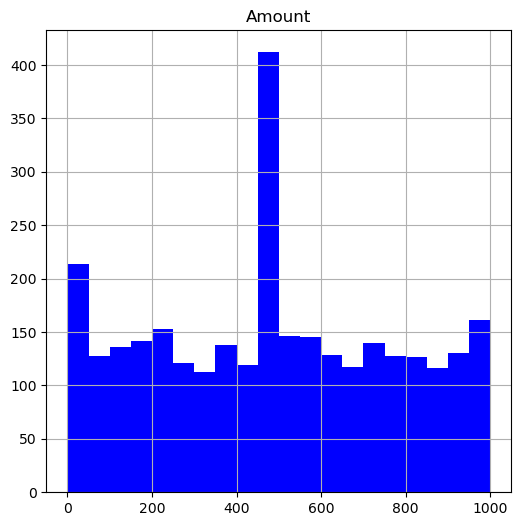

In [555]:
cust_trans.hist(column='Amount', figsize=(6,6), color="blue", bins=20)

In [556]:
#Getting the mode
cust_trans['Amount'].mode()

0    489.015
Name: Amount, dtype: float64

In [557]:
#Getting the median
cust_trans['Amount'].median()

489.015

In [558]:
#Getting IQR 
cust_trans['Amount'].quantile(0.75) - cust_trans['Amount'].quantile(0.25)

476.395

Amount    Axes(0.1,0.15;0.8x0.75)
dtype: object

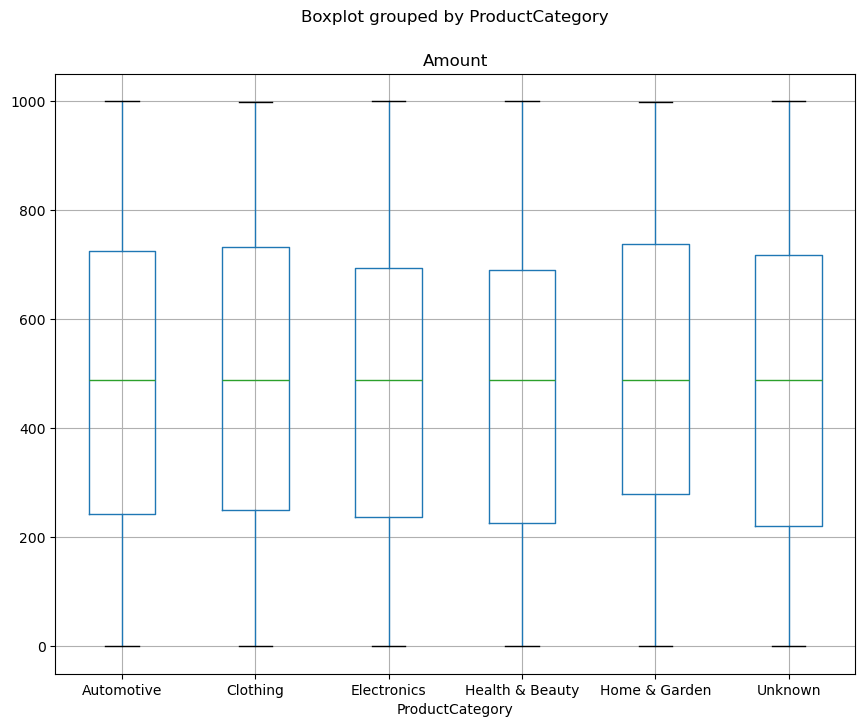

In [559]:
#Plotting Data via Boxplot by Product Category
cust_trans.boxplot(column='Amount', by='ProductCategory', return_type='axes', figsize=(10,8))

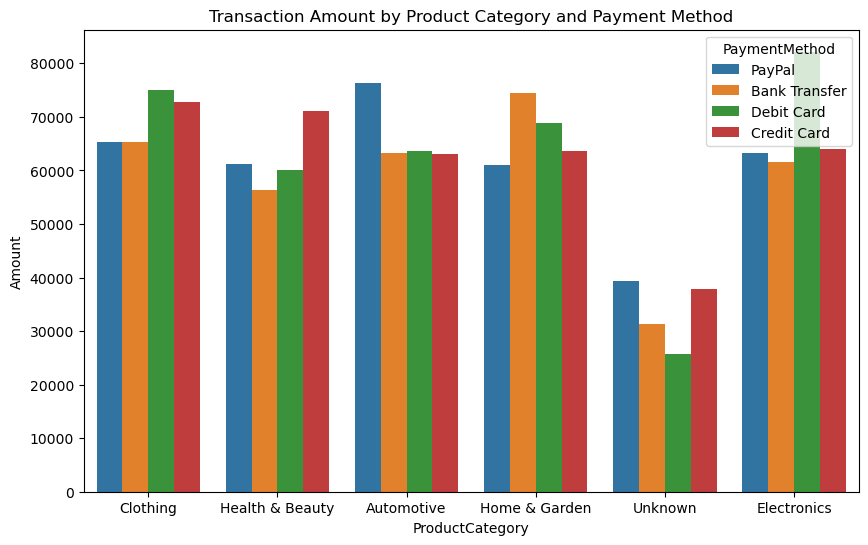

In [598]:
#PLotting Categorical Data

plt.figure(figsize=(10,6))
sns.barplot(data= cust_trans, x='ProductCategory', y='Amount', hue= 'PaymentMethod', errorbar=None, estimator='sum')
plt.title('Transaction Amount by Product Category and Payment Method')
plt.show()

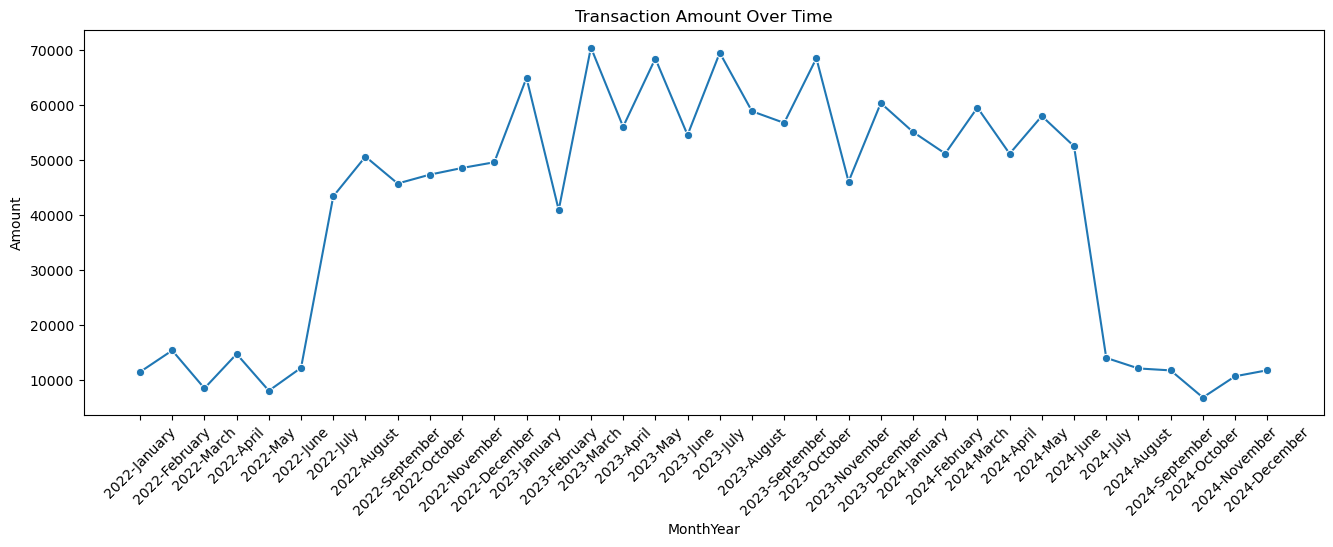

In [612]:
cust_trans2 = cust_trans.copy()
cust_trans2['TransactionDate'] = pd.to_datetime(cust_trans2['TransactionDate'], format='mixed')
cust_trans2['Year'] = cust_trans2['TransactionDate'].dt.year
cust_trans2['Month'] = cust_trans2['TransactionDate'].dt.month_name()
cust_trans2['MonthYear']= cust_trans2['Year'].astype(str) + '-' + cust_trans2['Month'].astype(str)
cust_trans2.sort_values(by='TransactionDate', inplace=True)
plt.figure(figsize=(16,5))
sns.lineplot(data= cust_trans2, x='MonthYear', y='Amount', errorbar=None, estimator='sum', marker= "o")
plt.title('Transaction Amount Over Time')
plt.xticks(rotation=45)
plt.show()

In [565]:
#Loading Datasets

cust_demo = pd.read_csv(r"C:\Users\jhoan\Downloads\Jupyter Output Files\cleaned_cust_demo.csv")
cust_demo.head(10)

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
0,9207fa75-5758-48d1-94ad-19c041e0520f,51,Female,Jensenberg,Low,17/11/2022
1,5fb09cd8-a473-46f7-80bd-6e49cf509078,45,Female,Castilloport,High,21/07/2020
2,c139496e-cc89-498a-bd90-1fb4627b6cff,37,Male,Lake Jennifertown,Unknown,01/01/2021
3,50118139-7264-428f-81cc-a25fddc5d6dd,44,Male,Port Carl,Medium,10/06/2024
4,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50,Female,Jessebury,High,24/08/2023
5,2de49c7c-32ae-4ba8-b058-622a090d7094,53,Female,Emilyville,Low,13/02/2022
6,89f7de44-e592-43c6-b033-bcbcf24088ba,45,Female,South Derekbury,High,08/12/2019
7,9f2128cd-2f2b-4f71-987c-29fd045021f0,45,Female,Lake Erin,Medium,26/04/2022
8,fbcd7128-ce04-4799-8c1c-722330507b96,45,Female,New Reginabury,Unknown,17/04/2022
9,40f5a5dd-a46f-4a5e-8c0f-fe04389ddec8,45,Female,Mariaberg,High,18/02/2024


In [566]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   3023 non-null   object
 1   Age          3023 non-null   int64 
 2   Gender       3023 non-null   object
 3   Location     3023 non-null   object
 4   IncomeLevel  3023 non-null   object
 5   SignupDate   3023 non-null   object
dtypes: int64(1), object(5)
memory usage: 141.8+ KB


In [567]:
cust_demo.describe()

,Age
count,3023.000000
mean,44.886867
std,14.539220
min,18.000000
25%,34.000000
50%,45.000000
75%,57.000000
max,68.000000


In [568]:
cust_demo.isnull().sum()

CustomerID     0
Age            0
Gender         0
Location       0
IncomeLevel    0
SignupDate     0
dtype: int64

In [569]:
categorical = cust_demo.dtypes[cust_demo.dtypes == "object"].index
print(categorical)
cust_demo[categorical].describe()

Index(['CustomerID', 'Gender', 'Location', 'IncomeLevel', 'SignupDate'], dtype='object')


,CustomerID,Gender,Location,IncomeLevel,SignupDate
count,3023,3023,3023,3023,3023
unique,3000,2,2696,4,1468
top,08995799-8d0f-40d6-986b-452074709b5f,Female,Port Michael,High,09/11/2020
freq,2,1528,5,946,9


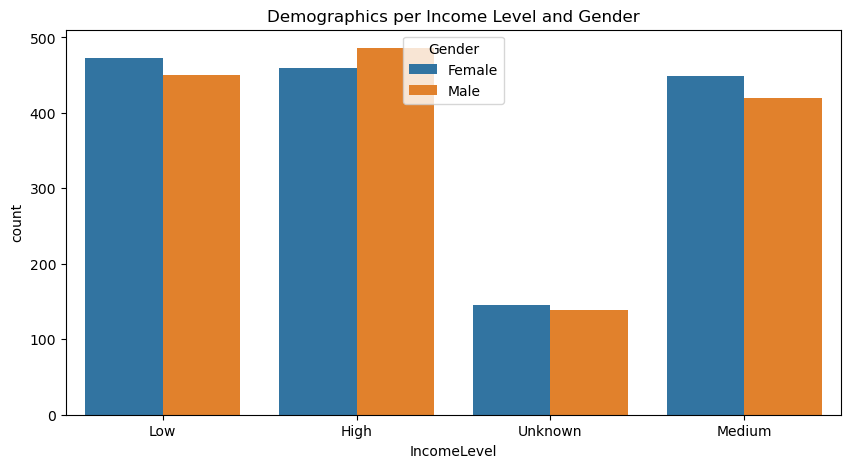

In [633]:
plt.figure(figsize=(10,5))
sns.countplot(data= cust_demo, x='IncomeLevel', hue='Gender')
plt.title('Demographics per Income Level and Gender')
plt.show()

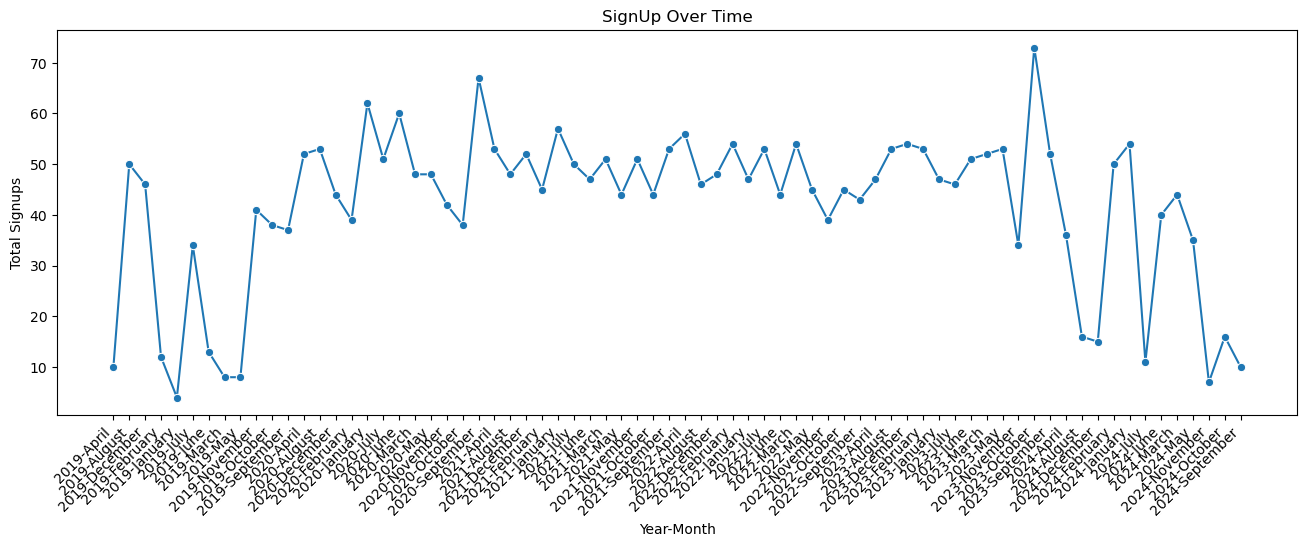

In [645]:
cust_demo2 = cust_demo.copy()
cust_demo2['SignupDate'] = pd.to_datetime(cust_demo2['SignupDate'], format='mixed')
cust_demo2['SignupYear'] = cust_demo2['SignupDate'].dt.year
cust_demo2['SignupMonth'] = cust_demo2['SignupDate'].dt.month_name()
signup = cust_demo2.groupby(['SignupYear','SignupMonth']).size()
signup = signup.reset_index(name='Count')
signup['YearMonth'] =signup['SignupYear'].astype(str) + '-' + signup['SignupMonth'].astype(str)
plt.figure(figsize=(16,5))
sns.lineplot(x= 'YearMonth', y='Count', data=signup, marker= "o")
plt.title('SignUp Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Signups')
plt.xticks(rotation=45, ha='right')
plt.show()

# EDA on Social Media Transactions

In [571]:
#Loading Datasets

soc_med = pd.read_csv(r"C:\Users\jhoan\Downloads\Jupyter Output Files\cleaned_soc_med.csv")
soc_med.head(10)

,CustomerID,InteractionID,InteractionDate,Platform,InteractionType,Sentiment
0,2dcb9523-356b-40b2-a67b-1f27797de261,e5d15761-d0a7-4329-89e3-79a892c56097,11/07/2023,Other,Comment,Neutral
1,e12c37b3-7d4d-472f-9fd8-0df2cb3001aa,02f9f376-70ae-4fcd-9070-1db977939948,06/07/2023,Twitter,Share,Neutral
2,08a911a3-65e6-4f5d-a6a1-ae7ddcbe28a2,a83fa04c-f109-4f24-8ce1-2078154f6a1c,24/05/2024,Instagram,Comment,Neutral
3,efdfdfc9-5dbb-4478-911a-101a390a0285,28a69c4b-a2e4-4c74-a130-1132d7733fdf,01/11/2023,Instagram,Like,Neutral
4,ca1e90f6-0e5f-492e-ab92-252ff540da18,d9d1c6f8-5e15-4738-b52b-13c2982420cc,08/07/2023,Instagram,Like,Positive
5,3e44871b-f56c-4576-b1ca-d1dc999e2166,0c409883-8396-48e4-83fb-887329848696,18/12/2023,Instagram,Comment,Positive
6,aa5eea4b-c948-41f4-9285-229a470002aa,4034dadf-6541-40d6-a7f0-16b20a009c04,15/11/2023,Instagram,Share,Positive
7,7d83304d-2501-4c9f-ba63-a1a14343e51f,bcfc43e7-c5aa-4dbd-9961-0e108784b199,29/03/2024,Instagram,Comment,Neutral
8,bd90f5cb-05a7-40f4-acb1-eedf48b58ffa,d2a06664-703d-4bc1-9401-a06f8c43fda5,02/05/2024,Other,Like,Neutral
9,63ee220c-19ae-4113-b45c-276b22b068e1,67cdfb0b-3da6-46b8-a1f4-03b2abc81f58,18/11/2023,Other,Comment,Positive


In [572]:
soc_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       3020 non-null   object
 1   InteractionID    3020 non-null   object
 2   InteractionDate  3020 non-null   object
 3   Platform         3020 non-null   object
 4   InteractionType  3020 non-null   object
 5   Sentiment        3020 non-null   object
dtypes: object(6)
memory usage: 141.7+ KB


In [573]:
soc_med.describe()

,CustomerID,InteractionID,InteractionDate,Platform,InteractionType,Sentiment
count,3020,3020,3020,3020,3020,3020
unique,1893,3000,379,4,3,5
top,fd35b6b4-ad1c-49cc-9c34-8c2d696f38e2,98cf7859-e4a9-465b-96fe-ed51a1f1aa92,27/12/2023,Instagram,Comment,Positive
freq,5,2,16,921,1018,1007


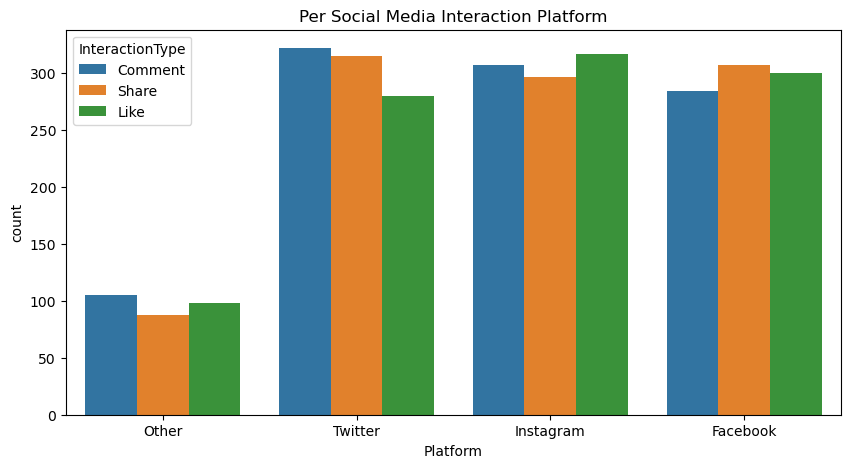

In [618]:
plt.figure(figsize=(10,5))
sns.countplot(data= soc_med, x='Platform', hue= 'InteractionType')
plt.title('Per Social Media Platform Interaction')
plt.xlabel('Platform')
plt.show()

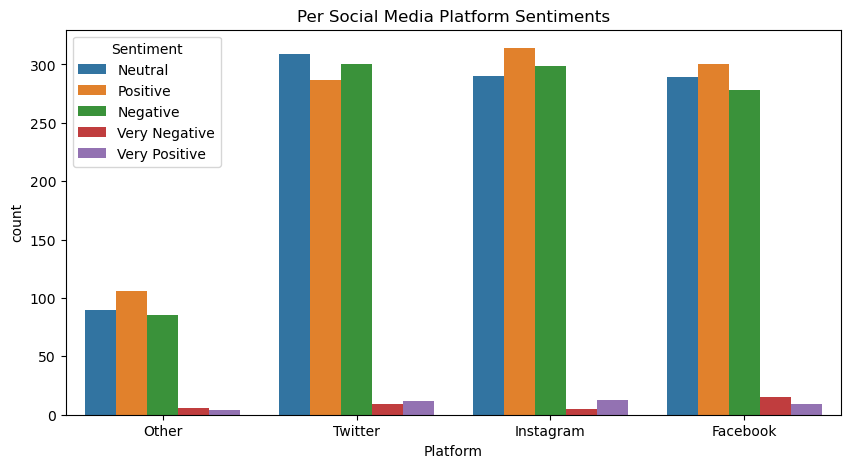

In [620]:
plt.figure(figsize=(10,5))
sns.countplot(data= soc_med, x='Platform', hue= 'Sentiment')
plt.title('Per Social Media Platform Sentiments')
plt.xlabel('Platform')
plt.show()